### Librerias

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Ejercicios

1. Lea los datos del dataset.

In [5]:
df = pd.read_csv('data/traffic-data.csv')
df

,_id,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,1,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,3,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,4,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,5,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,900084526,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,53940,900089213,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,53941,900095322,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,53942,900099922,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


2. ¿Cuándo es más común tener un accidente? (fin de semana o entre semana)

    Respuesta: Es más común sufrir un accidente entre semana con un 75.37% de probabilidad

In [10]:
def freq_table(df, column: str):
    '''
    Returns a Frequency table for a given df and column
    '''

    frequency_table = df[column].value_counts().reset_index()
    frequency_table.columns = ['Value', 'Frequency']

    total_frequency = frequency_table['Frequency'].sum()
    total_row = pd.DataFrame({'Value': ['TOTAL'], 'Frequency': [total_frequency]})
    frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

    frequency_table['Relative Freq.'] = round((frequency_table['Frequency'] / total_frequency), 4)*100

    return frequency_table

In [39]:
week_ft = freq_table(df, 'Weekend?')
week_df = week_ft.iloc[:-1]
week_ft

,Value,Frequency,Relative Freq.
0,Weekday,40604,75.37
1,Weekend,13271,24.63
2,TOTAL,53875,100.00


Text(0.5, 1.0, 'Week Accidents')

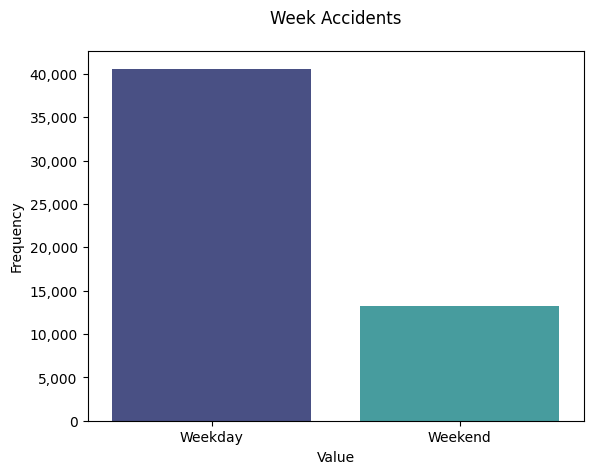

In [61]:
week_graph = sns.barplot(x='Value', y='Frequency', data=week_df, hue='Value', palette='mako', legend=False)
week_graph.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Week Accidents', pad=20)

3. ¿Cuáles son las peores horas para salir?

    Repuesta: De acuerdo con la gráfica y la tabla las 5 peores horas para salir son:
    * 17:00
    * 16:00
    * 15:00
    * 12:00
    * 14:00

In [54]:
hour_ft = freq_table(df, 'Hour')
hour_df = hour_ft[:-1]
hour_df.head(5)

,Value,Frequency,Relative Freq.
0,1700.0,4631,8.62
1,1600.0,4488,8.35
2,1500.0,4283,7.97
3,1200.0,3819,7.11
4,1400.0,3750,6.98


Text(0.5, 1.0, 'Accidents per Hour')

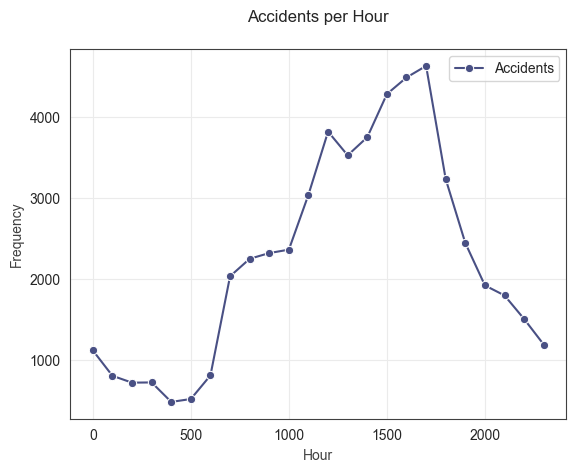

In [65]:
sns.set_style('whitegrid', {'grid.color': '.92', 'grid.linestyle': '-', 'axes.labelcolor': '.25', 'axes.edgecolor': '.25'})
sns.lineplot(x='Value', y='Frequency', data=hour_df, marker='o', color='#495084', label='Accidents')

plt.xlabel('Hour')
plt.title('Accidents per Hour', pad=20)

4. ¿Cuántos accidentes ocurrieron en total? ¿Cuántos en 2010?

    Respuesta: Ocurrieron 53943 accidentes en total y, de estos, 4060 ocurrieron en el 2010

In [70]:
df_2010 = df[df['Year'] == 2010]
df_2010

,_id,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
20675,20676,901262883,2010,1,7,Weekend,2000.0,1-Car,No injury/unknown,ANIMAL/OBJECT IN ROADWAY,BOTTOM & DENNY RD,39.706660,-86.55548
20676,20677,901466076,2010,7,4,Weekday,1600.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,OLD STATE ROAD 37 SOUTH RD & STATE ROAD 37,39.533394,-86.48081
20677,20678,901269157,2010,1,6,Weekday,500.0,1-Car,No injury/unknown,ANIMAL/OBJECT IN ROADWAY,OLD SR 37 SOUTH HWY & SR 37 SOUTH,39.427227,-86.48081
20678,20679,901550492,2010,12,1,Weekend,1400.0,2-Car,No injury/unknown,ROADWAY SURFACE CONDITION,ANDERSON ROAD RD & OLD STATE ROAD 37 NORTH,39.371918,-86.50192
20679,20680,901551338,2010,12,2,Weekday,900.0,1-Car,Non-incapacitating,SPEED TOO FAST FOR WEATHER CONDITIONS,BUSINESS SR 37 HWY & OLD SR 37,39.365919,-86.53484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24730,24731,901561982,2010,12,4,Weekday,900.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,DRIVE TO 2711 E 10TH & SR45S,0.000000,0.00000
24731,24732,901564890,2010,12,3,Weekday,1300.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,ROGERS & SR37S,0.000000,0.00000
24732,24733,901565450,2010,12,6,Weekend,1900.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,45 EAST & FLOYD DR,0.000000,0.00000
24733,24734,901595793,2010,5,3,Weekday,400.0,2-Car,No injury/unknown,NaN,NaN,0.000000,0.00000


In [72]:
acc_totales = len(df)
acc_2010 = len(df_2010)

print(f'Número de accidentes totales: {acc_totales}')
print(f'Número de accidentes en el 2010: {acc_2010}')

Número de accidentes totales: 53943
Número de accidentes en el 2010: 4060


5. ¿Qué tipos de accidentes existen?

    Respuesta: 'No injury/unknown', 'Non-incapacitating', 'Incapacitating', 'Fatal'

In [73]:
df['Injury Type'].unique()

array(['No injury/unknown', 'Non-incapacitating', 'Incapacitating',
       'Fatal'], dtype=object)

6. ¿En qué ubicación hay 20% más accidentes año contra año?

In [81]:
df_year = df[['Year', 'Reported_Location']]
df_year

,Year,Reported_Location
0,2015,1ST & FESS
1,2015,2ND & COLLEGE
2,2015,BASSWOOD & BLOOMFIELD
3,2015,GATES & JACOBS
4,2015,W 3RD
...,...,...
53938,2003,DUNN & WHITE LOT WEST
53939,2003,RED OAK & SR446
53940,2003,2ND ST & WALNUT
53941,2003,NINETH & NORTH


In [85]:
grouped_data = df_year.groupby(['Reported_Location', 'Year']).size().reset_index(name='Accident Count')
grouped_data

,Reported_Location,Year,Accident Count
0,(NS ALLEY) E 3RD ST & S GRANT,2013,1
1,-,2005,1
2,- & JORDAN,2005,1
3,0000 DR,2008,1
4,052M & SR46,2010,1
...,...,...,...
34385,YOST AVE,2014,1
34386,ZIKES & ZIKES RD,2009,1
34387,ZIKES RD,2008,1
34388,ZIKES RD,2011,1


7. ¿En qué ubicación es mejor ser peatón?

    Respuesta: En cualquier ubicación que tenga solamente un accidente registrado (Revisar las tablas)

In [113]:
df_loc = df['Reported_Location'].value_counts().reset_index()
df_loc.columns = ['Reported_Location', 'Count']
df_loc = df_loc.sort_values(by='Count', ascending=True).reset_index(drop=True)
df_loc

,Reported_Location,Count
0,MAXWELL LANE & WOODLAWN AVENUE AVE,1
1,S OLD SR 37 RD & SR37,1
2,OLD STATE ROAD 37 SOUTH RD & SR37S,1
3,S OLD SR 37 & SR37N,1
4,S OLD STATE ROAD 37 & SR37N,1
...,...,...
19359,S WALNUT ST,172
19360,3RD ST,195
19361,SR37N & VERNAL,197
19362,W 3RD ST,222


In [114]:
df_loc[df_loc['Count'] == min(df_loc['Count'])]

,Reported_Location,Count
0,MAXWELL LANE & WOODLAWN AVENUE AVE,1
1,S OLD SR 37 RD & SR37,1
2,OLD STATE ROAD 37 SOUTH RD & SR37S,1
3,S OLD SR 37 & SR37N,1
4,S OLD STATE ROAD 37 & SR37N,1
...,...,...
13442,PINEGROVE & SR466,1
13443,15 & N INDIANA AVE,1
13444,10TH & 800 SMITH RD,1
13445,BABY CREEK RD & BRUMMETS CREEK,1


8. ¿Cuáles factores han disminuido?

    Respuesta: (Basado en la matriz de tabulación cruzada y las gráficas)
   * Alcoholic Beverages
   * CellPhone Usage
   * Disregard Signal/Reg Sign
   * Driver Illness
   * Failure to Yield Right
   * Glare
   * Holes/Ruts in Surface
   * Illegal Drugs
   * Improper Lane Usage
   * Improper Passing
   * Jackknifing
   * None (Driver)
   * None (Environmental)
   * None (Vehicle)
   * Other (Driver) - Explain in Narrative
   * Other (Environmental) - Explain in Narr
   * Other Lights Deffective
   * Other Telematics in Use
   * Passenger Distraction
   * Prescription Drugs
   * Ran off Road Left
   * Roadway Surface Condition
   * Steering Failure
   * Traffic Control Inoperative
   * Unsafe Speed
   * View Obstructed

In [115]:
df_factors = df[['Year', 'Primary Factor']]
df_factors

,Year,Primary Factor
0,2015,OTHER (DRIVER) - EXPLAIN IN NARRATIVE
1,2015,FOLLOWING TOO CLOSELY
2,2015,DISREGARD SIGNAL/REG SIGN
3,2015,FAILURE TO YIELD RIGHT OF WAY
4,2015,FAILURE TO YIELD RIGHT OF WAY
...,...,...
53938,2003,IMPROPER LANE USAGE
53939,2003,UNSAFE SPEED
53940,2003,BRAKE FAILURE OR DEFECTIVE
53941,2003,UNSAFE BACKING


In [116]:
cross_tab = pd.crosstab(df_factors['Primary Factor'], df_factors['Year'])
cross_tab

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Primary Factor,,,,,,,,,,,,,
ACCELERATOR FAILURE OR DEFECTIVE,6,0,1,2,4,5,1,6,8,6,4,1,6
ALCOHOLIC BEVERAGES,119,114,94,108,118,117,120,15,0,0,0,0,0
ANIMAL/OBJECT IN ROADWAY,64,87,90,81,121,123,153,148,142,172,175,155,177
BRAKE FAILURE OR DEFECTIVE,23,26,20,18,32,40,39,32,27,31,23,21,29
CELL PHONE USAGE,11,13,13,12,15,10,13,17,8,14,6,5,4
DISREGARD SIGNAL/REG SIGN,202,210,185,192,178,155,139,159,135,157,161,171,162
DRIVER ASLEEP OR FATIGUED,16,24,32,27,27,29,28,16,10,5,16,17,20
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE,7,122,98,172,204,196,211,123,110,107,109,111,86
DRIVER ILLNESS,18,14,15,18,17,14,15,10,15,7,13,11,15


In [ ]:
cross_tab_transposed = cross_tab.T
cross_tab_transposed

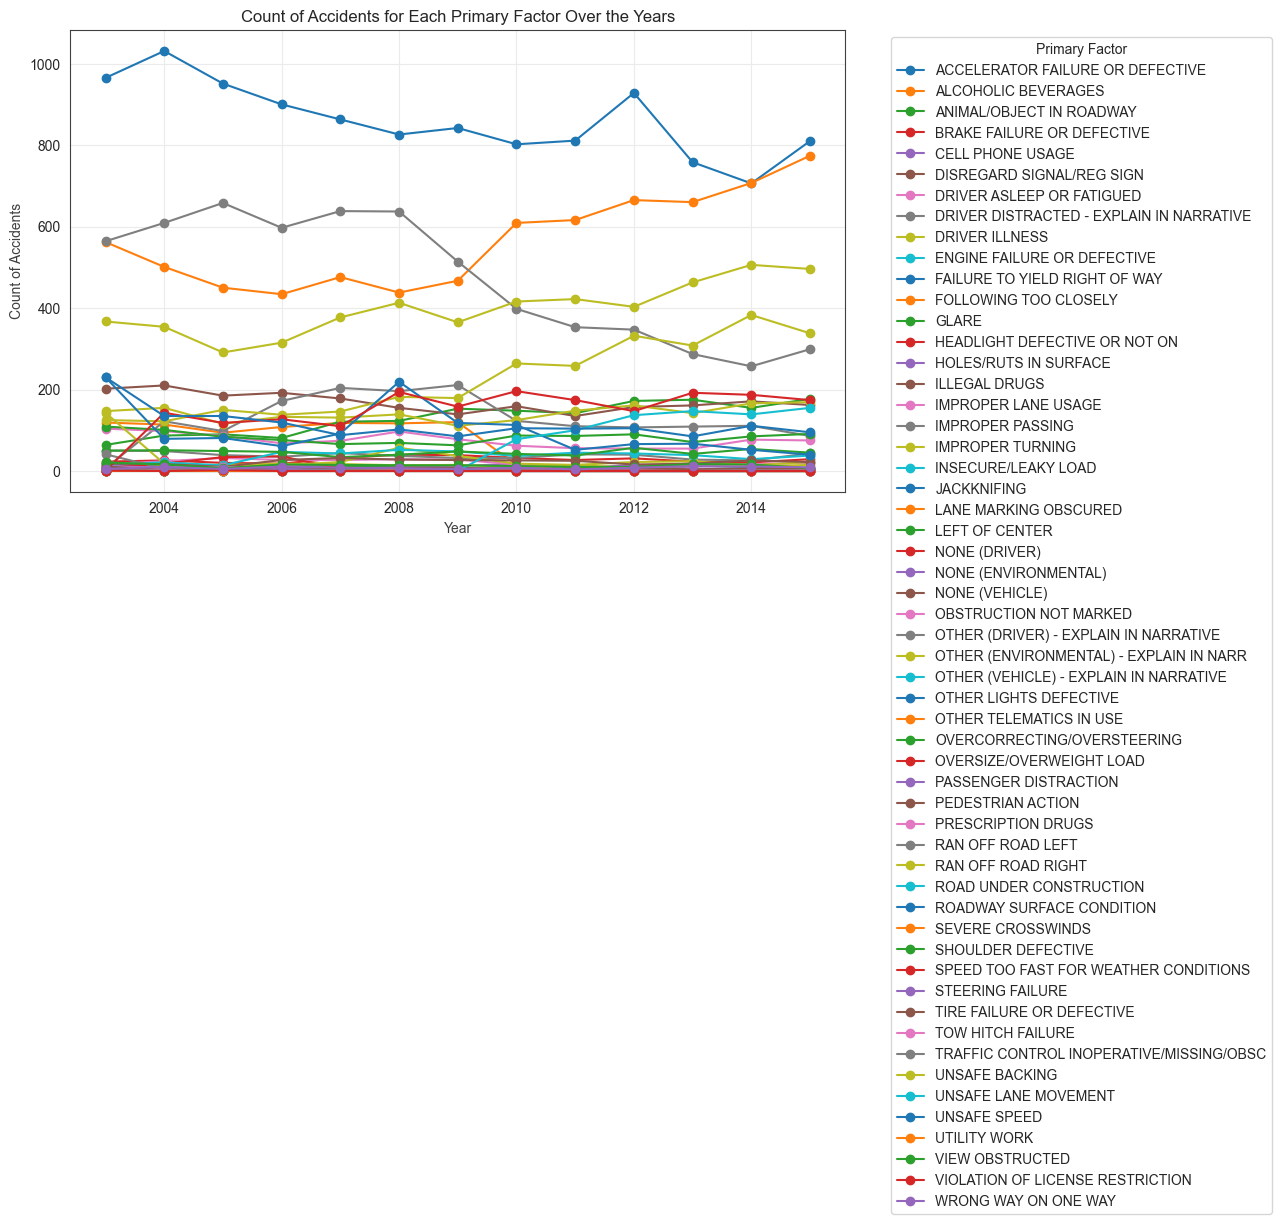

In [118]:
cross_tab_transposed.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.title('Count of Accidents for Each Primary Factor Over the Years')

plt.legend(title='Primary Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

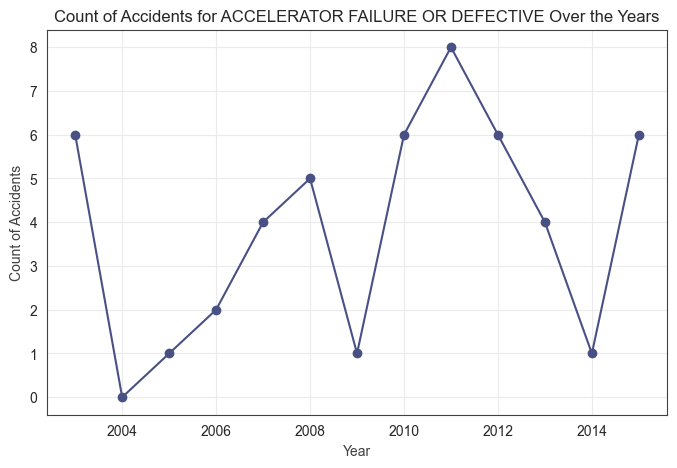

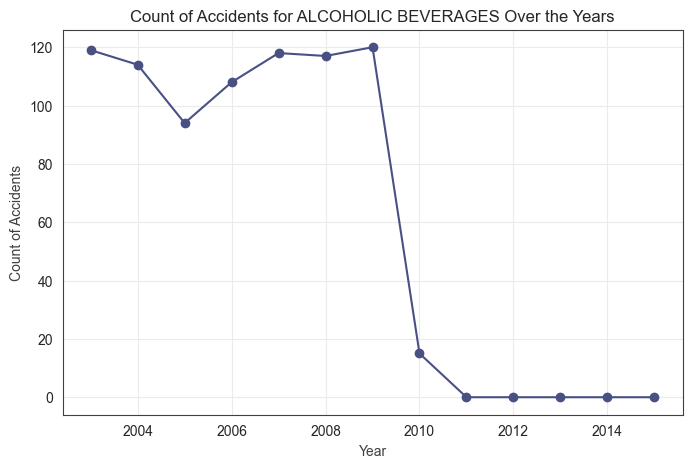

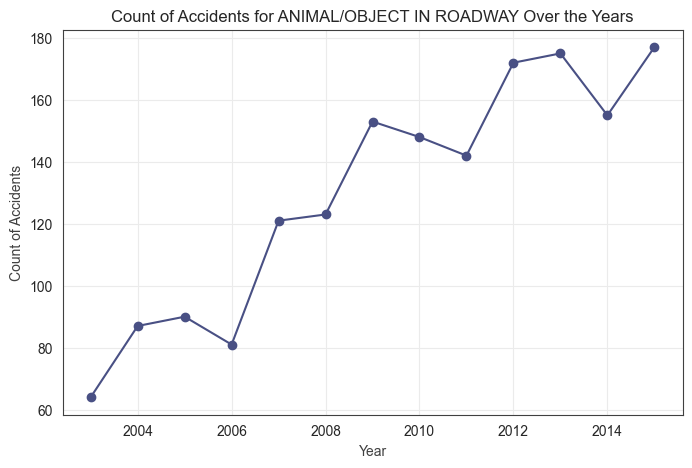

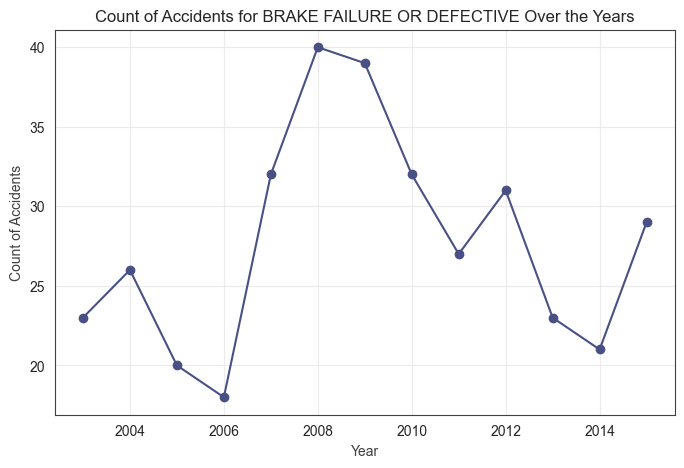

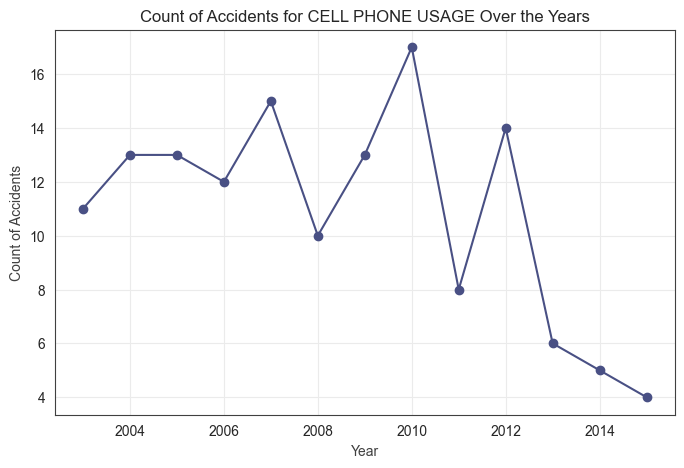

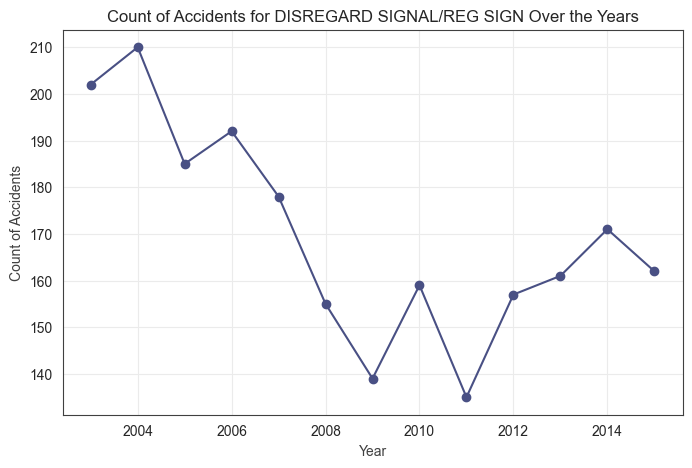

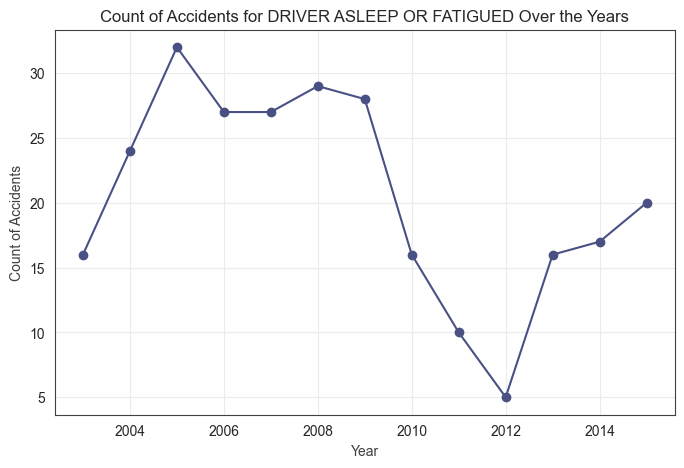

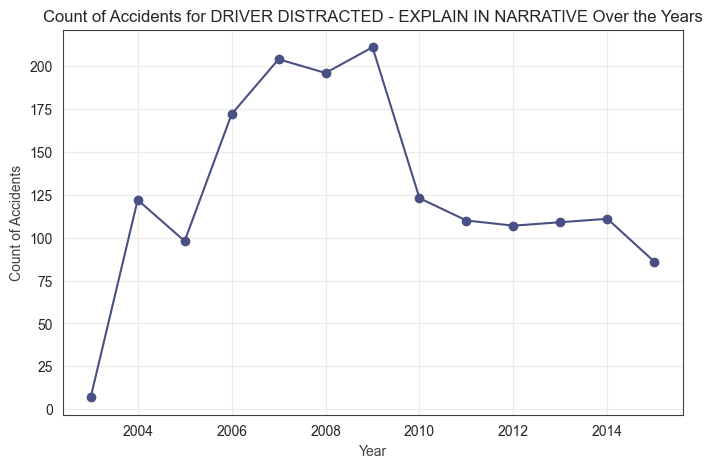

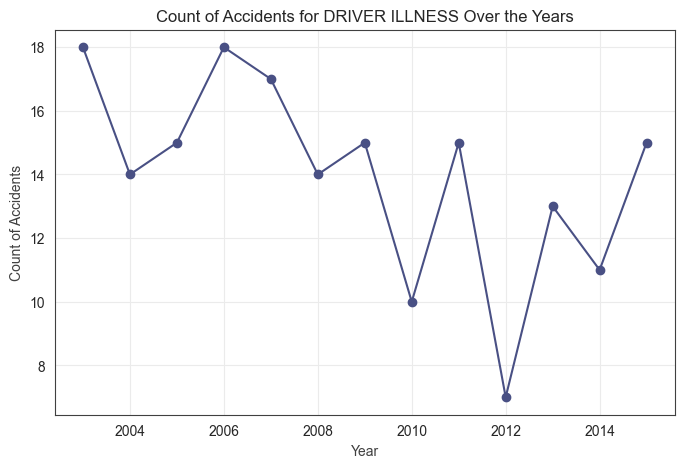

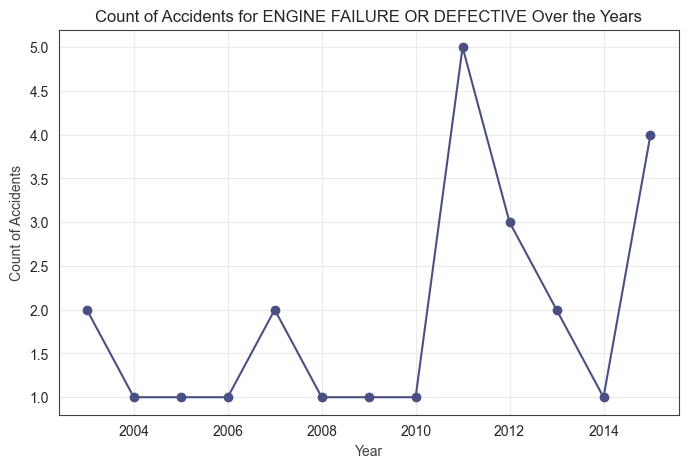

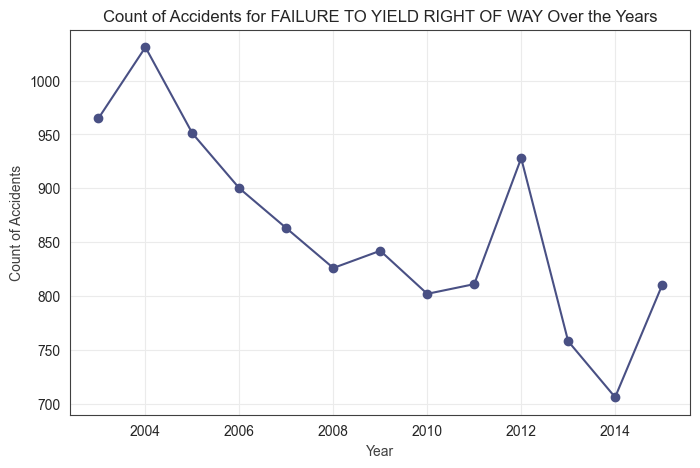

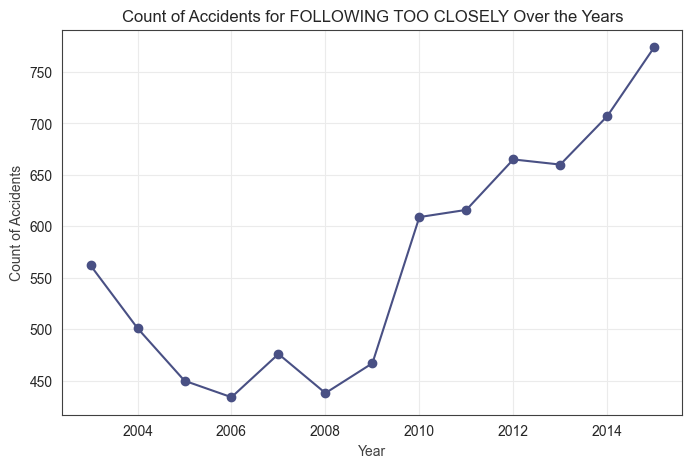

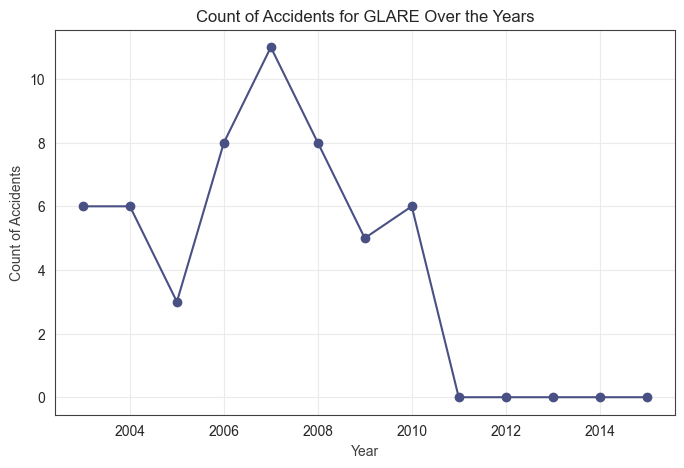

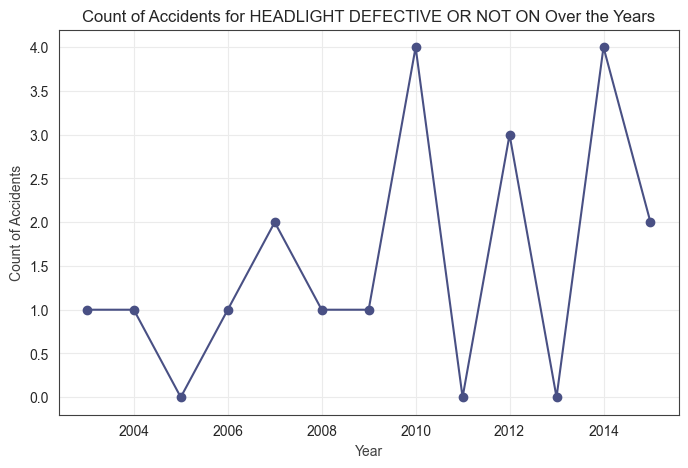

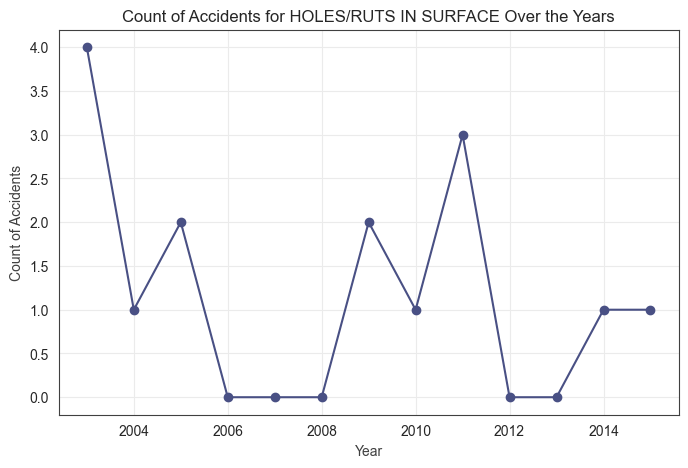

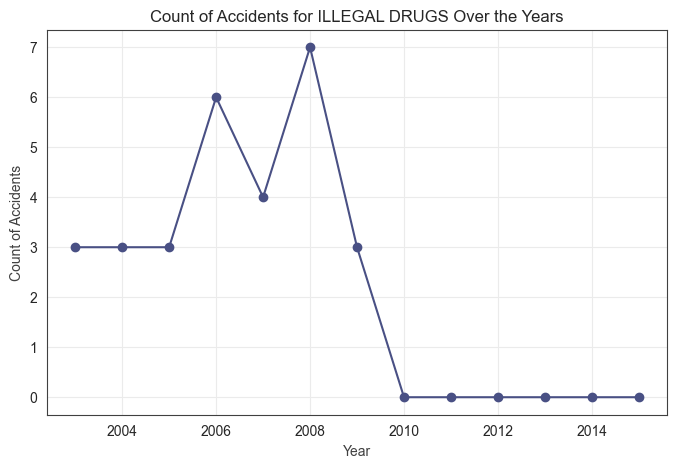

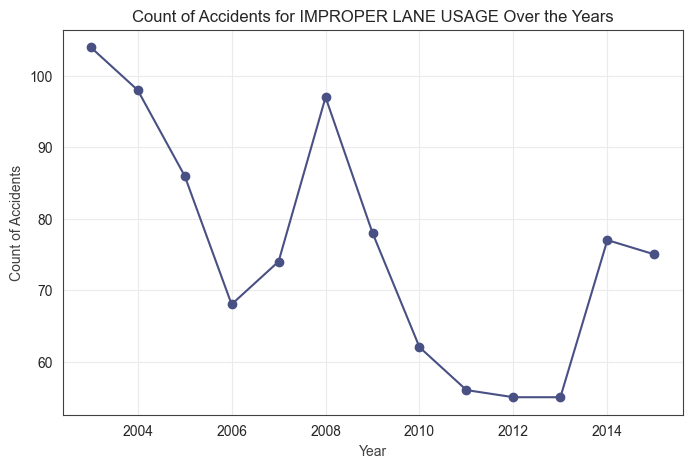

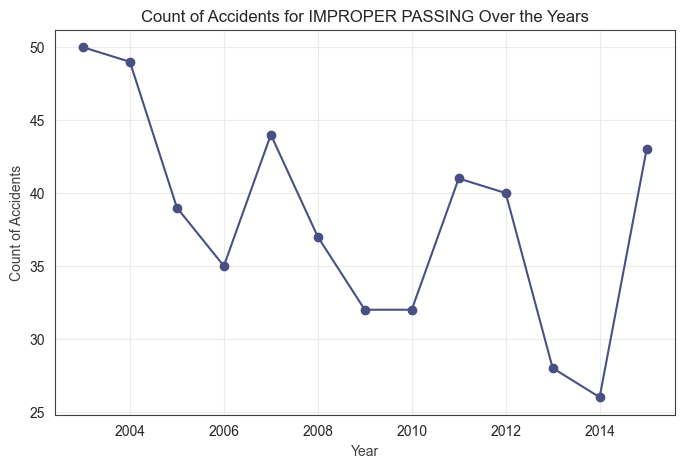

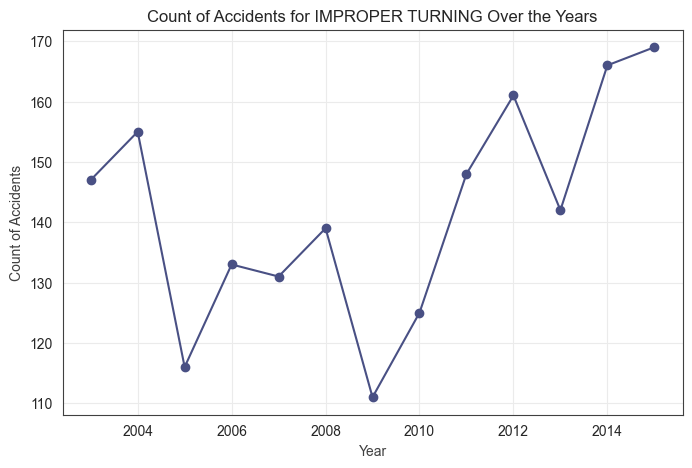

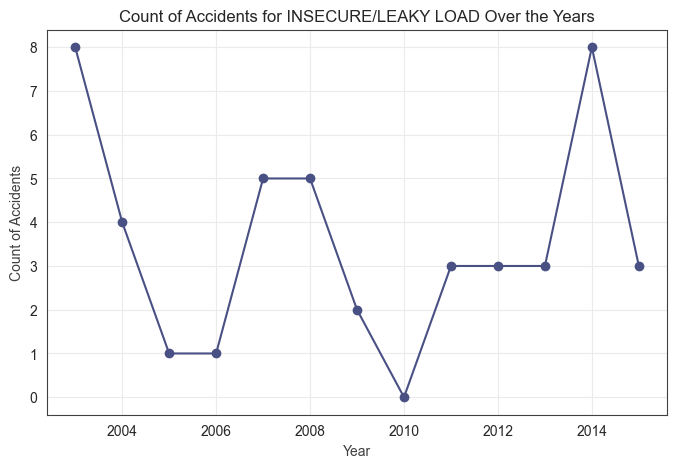

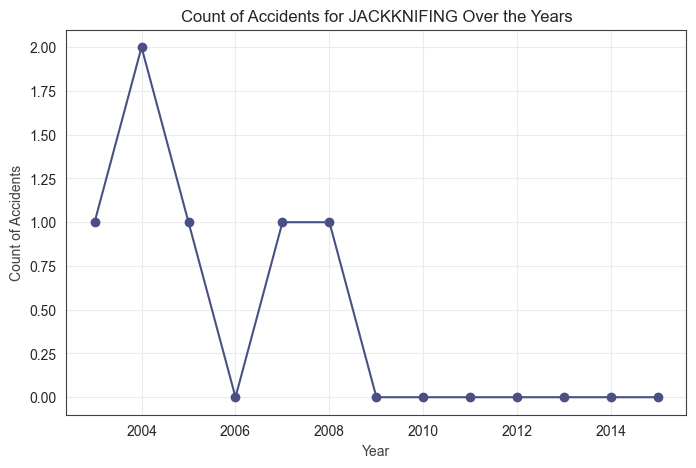

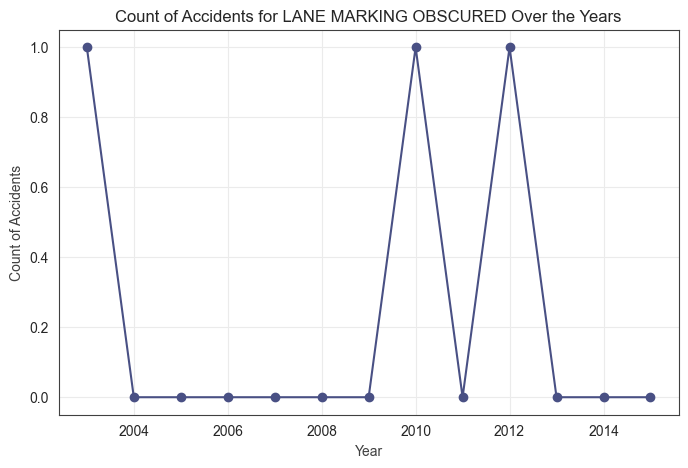

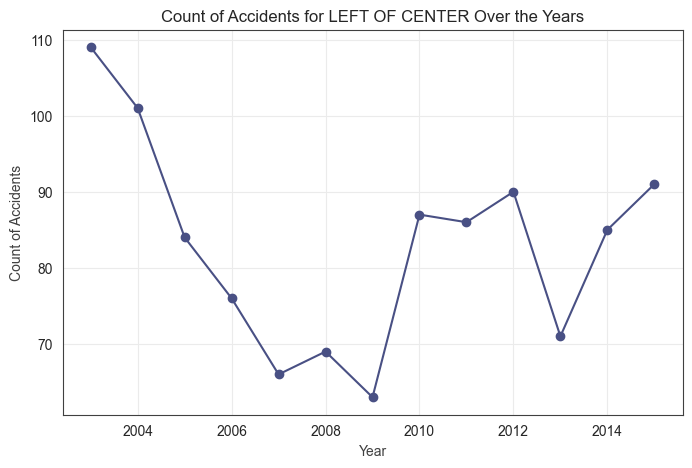

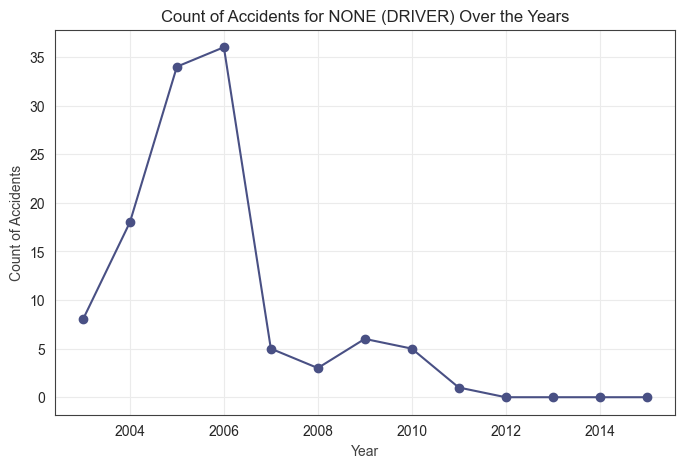

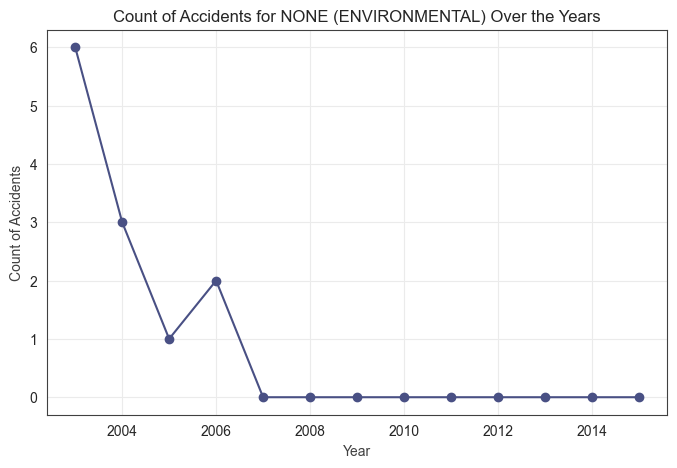

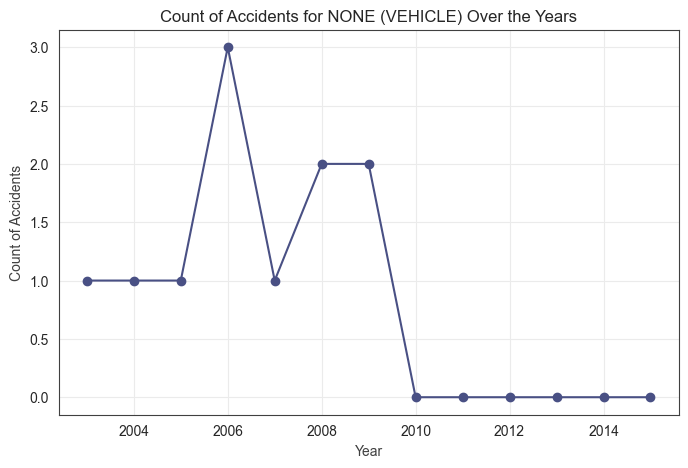

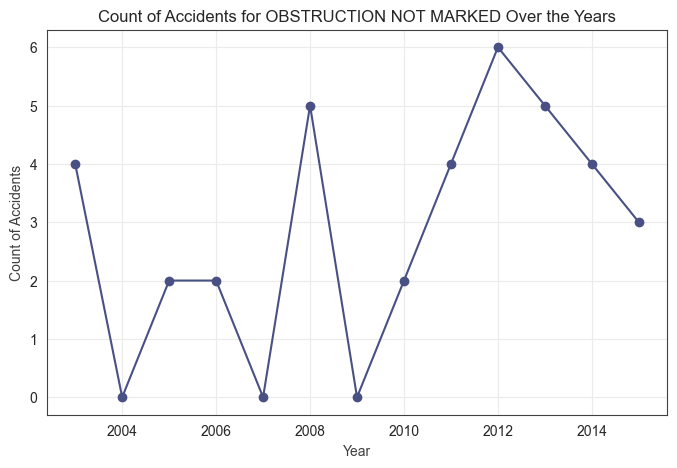

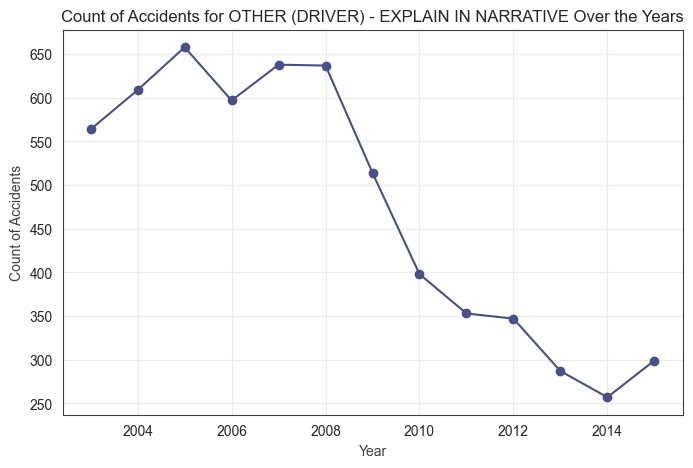

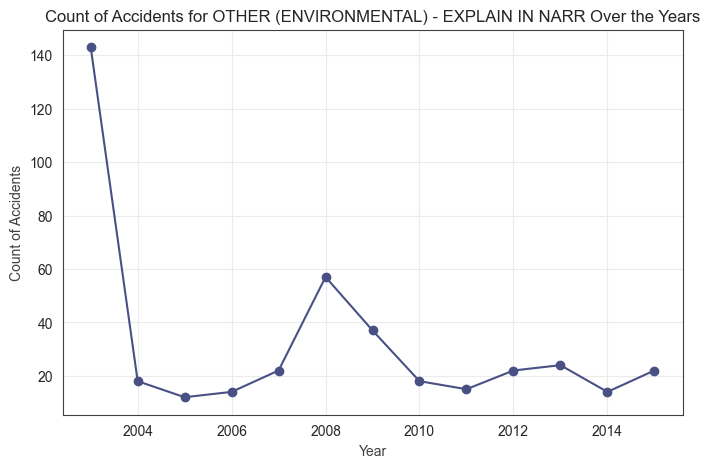

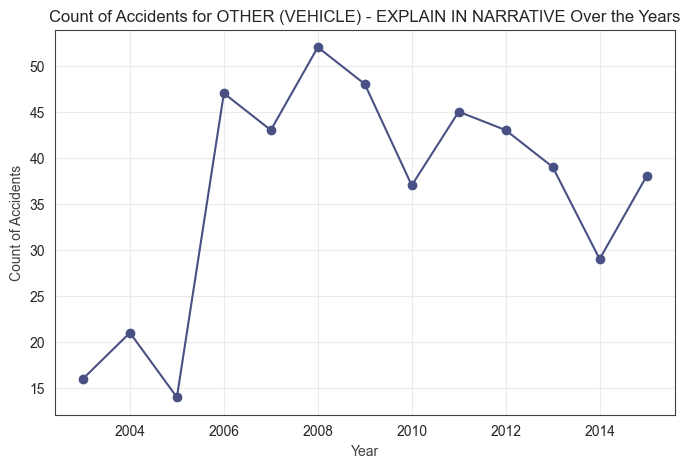

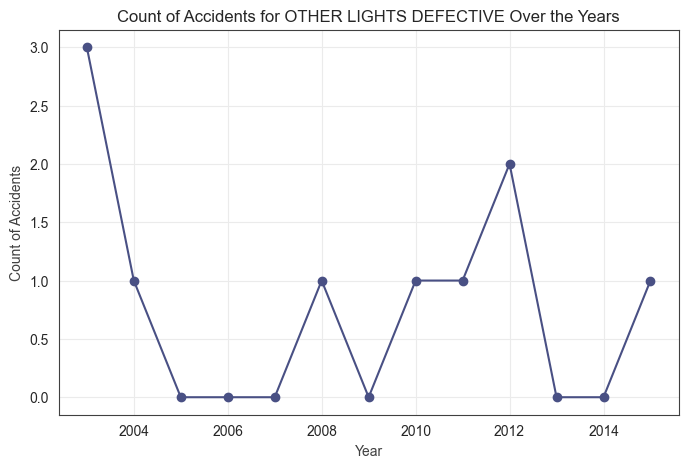

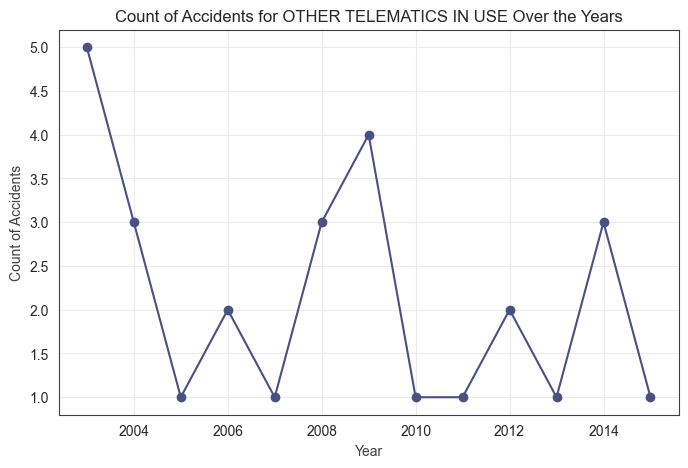

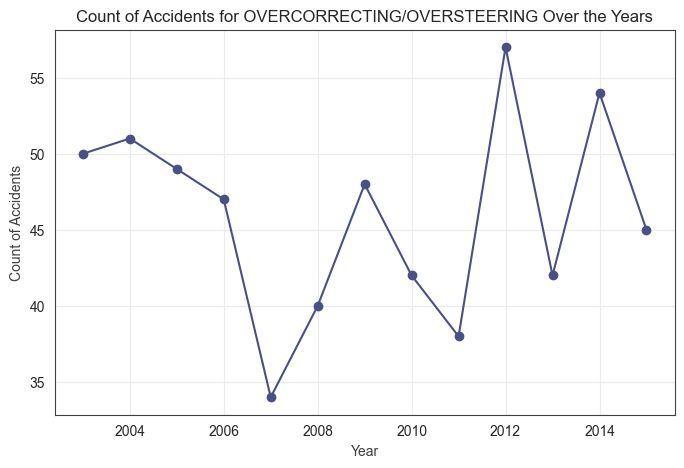

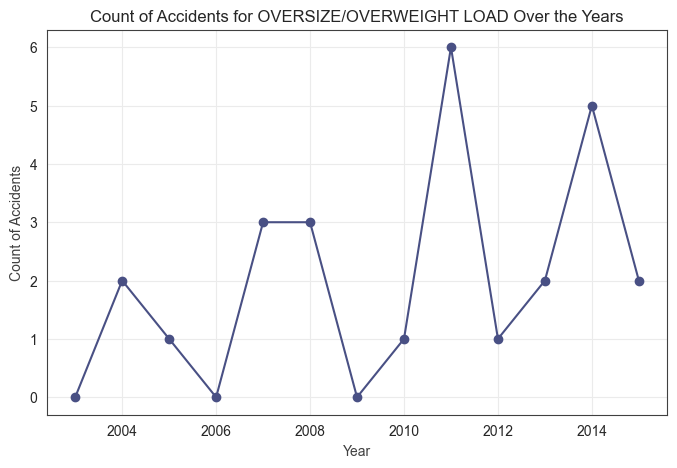

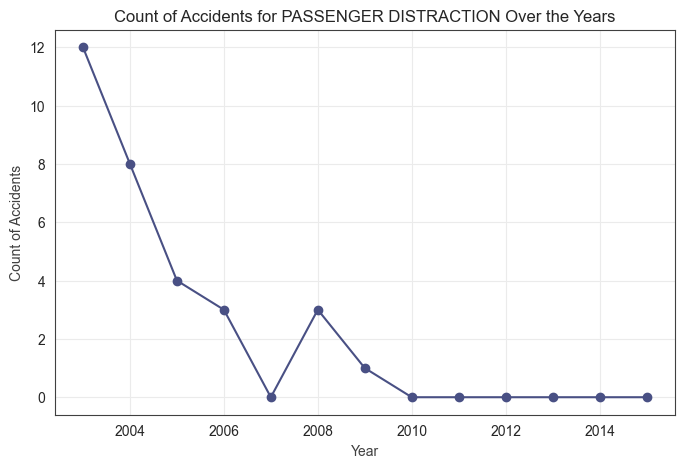

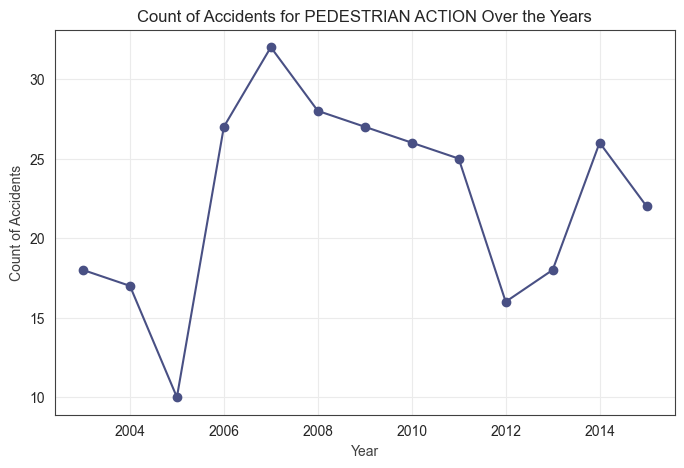

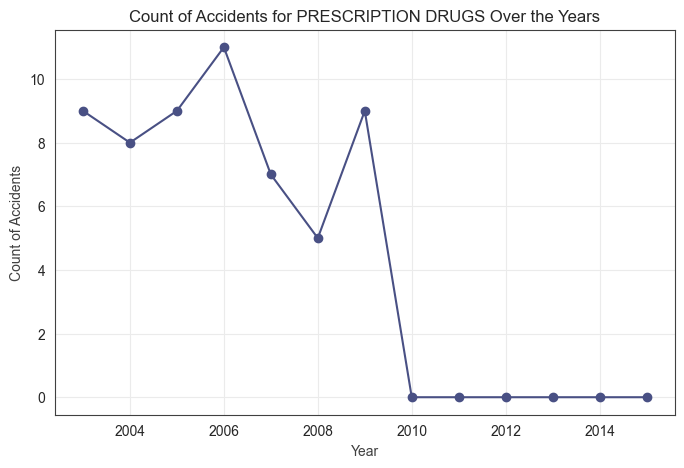

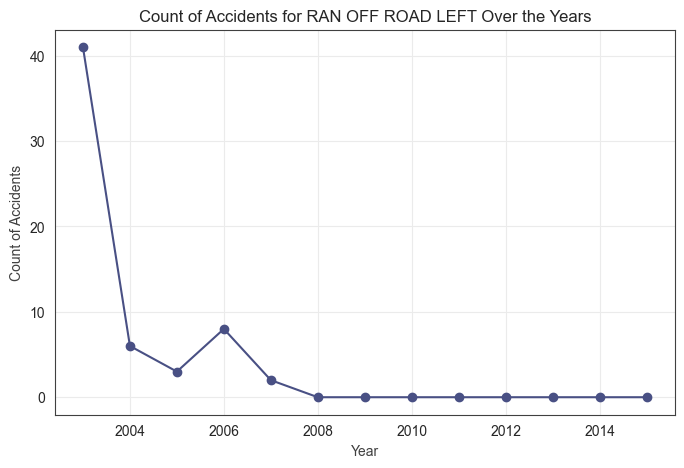

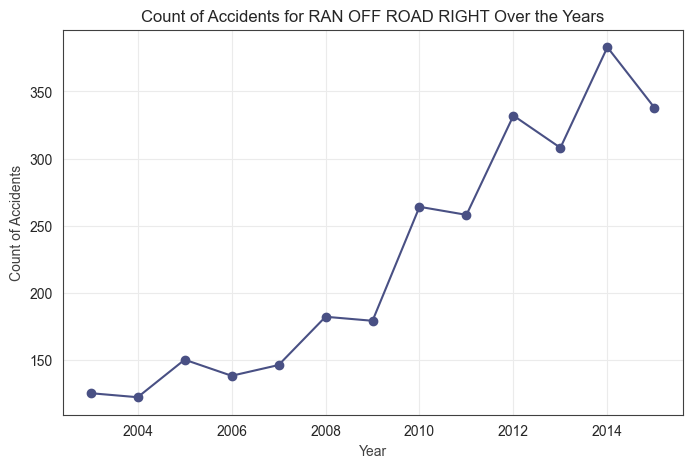

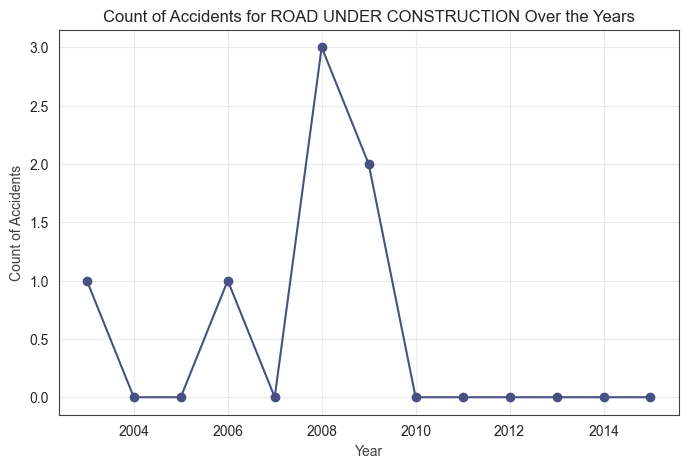

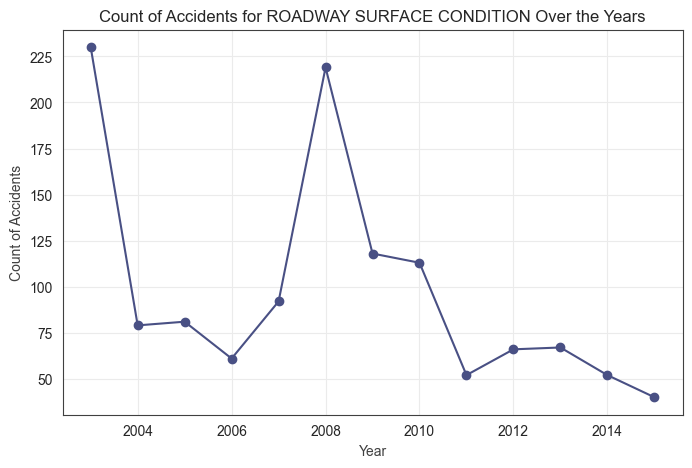

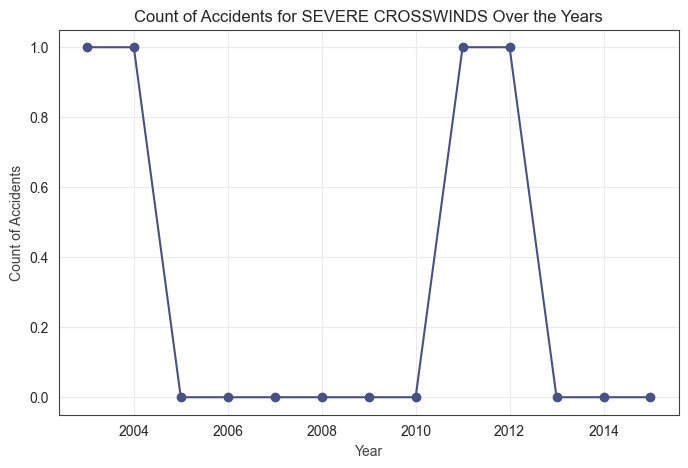

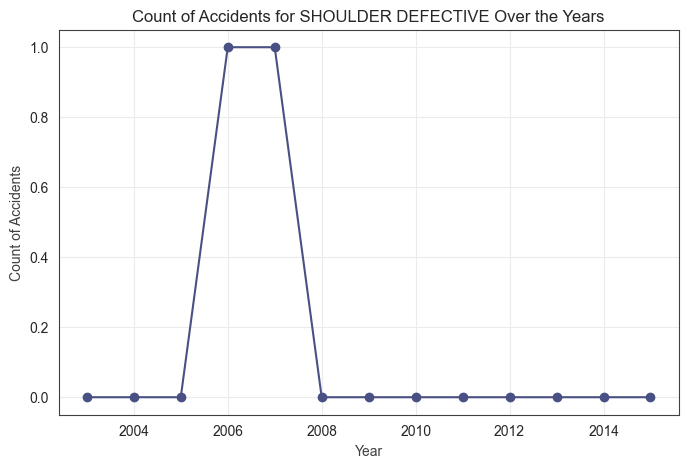

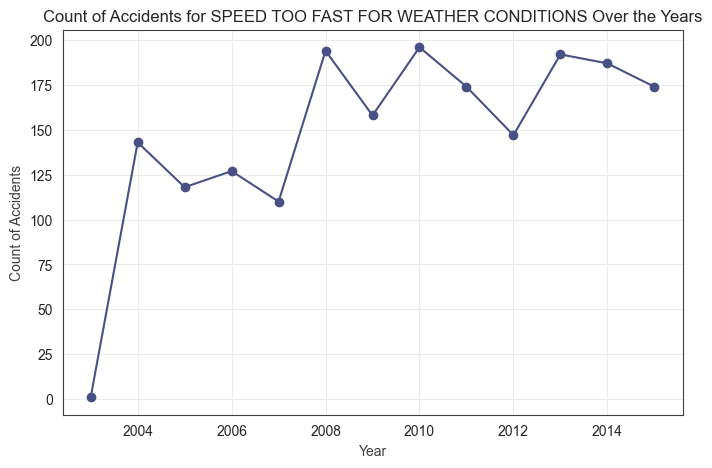

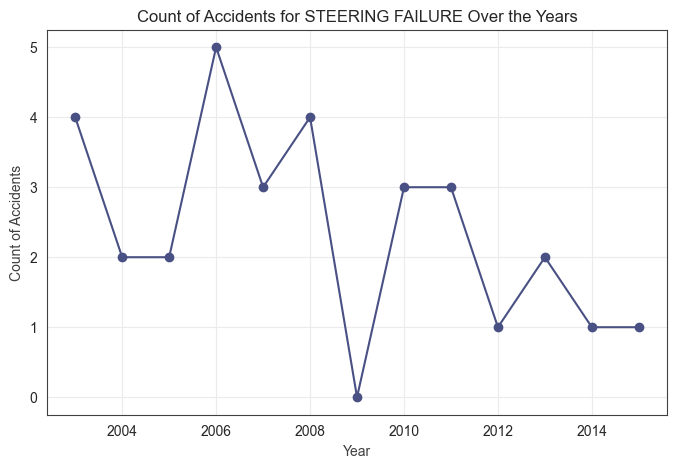

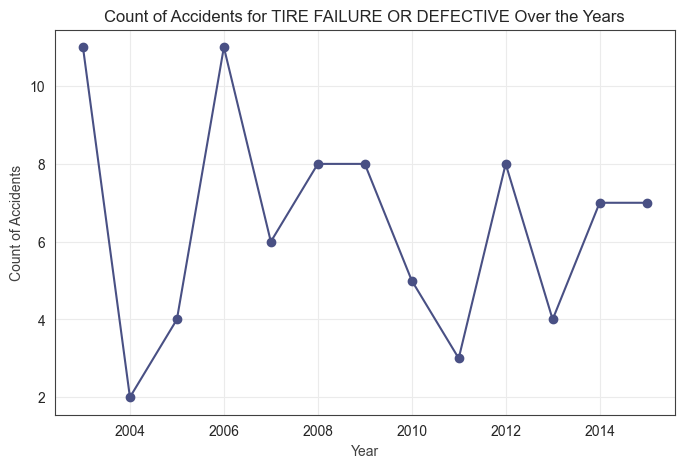

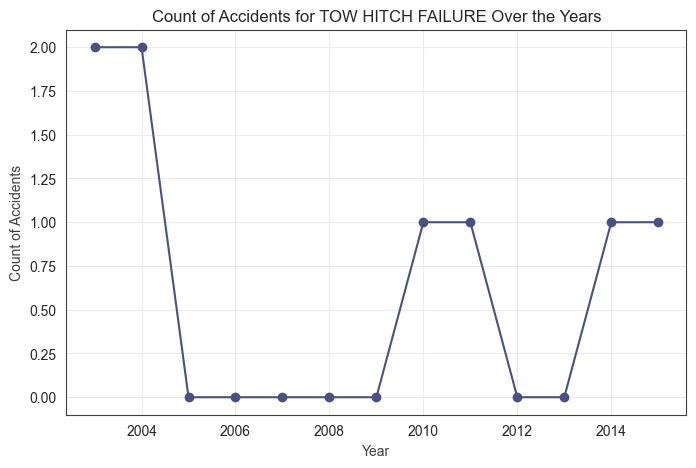

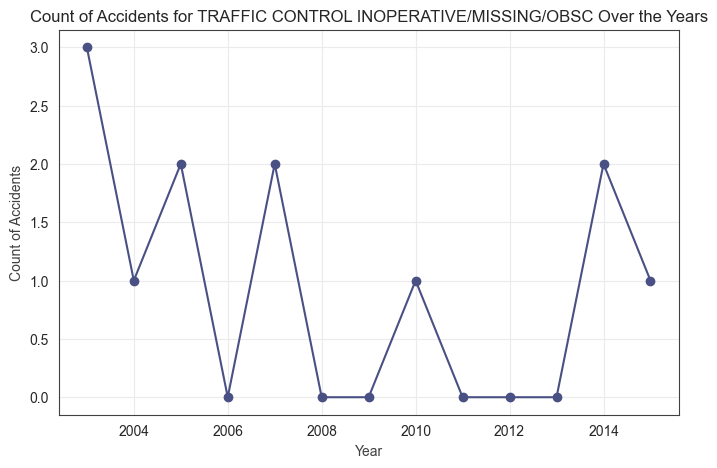

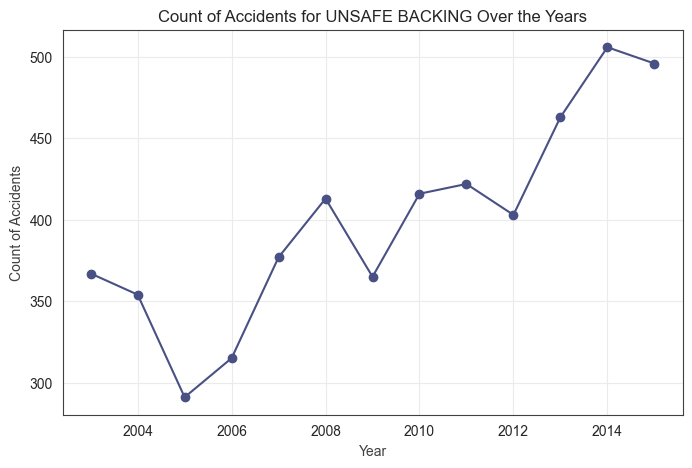

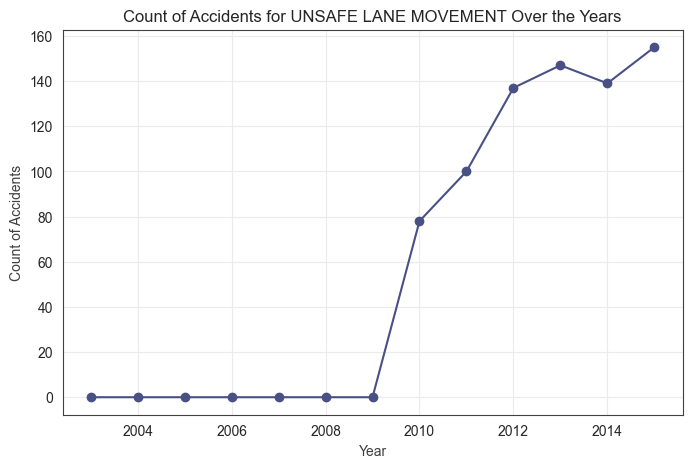

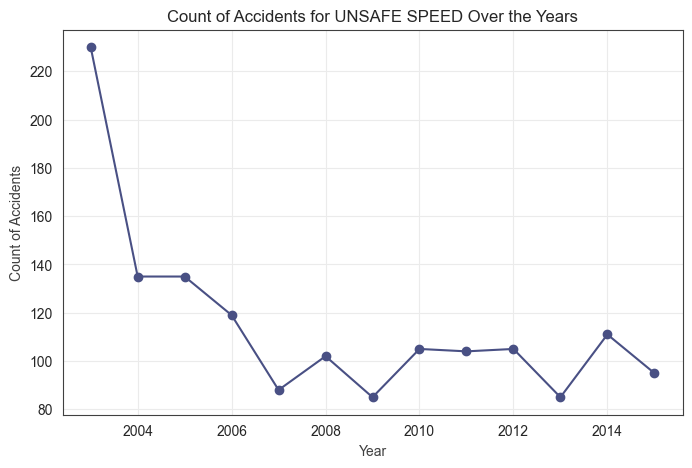

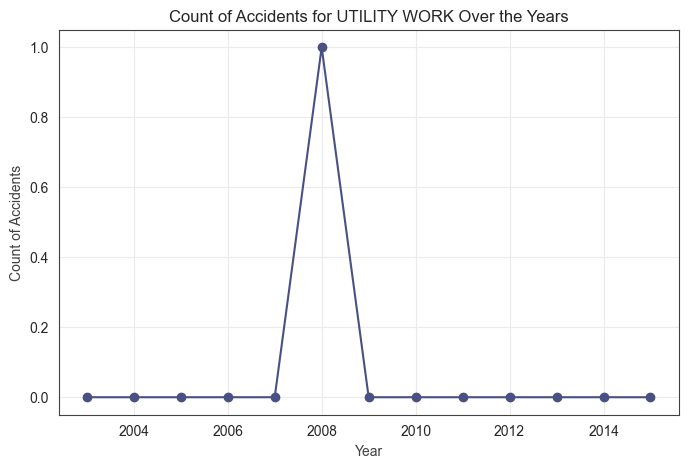

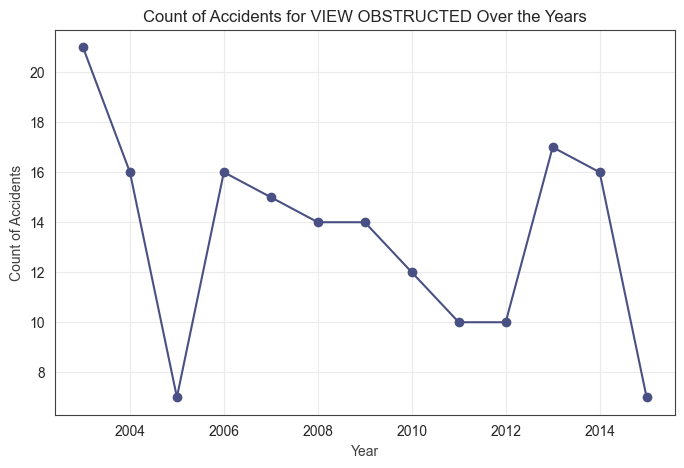

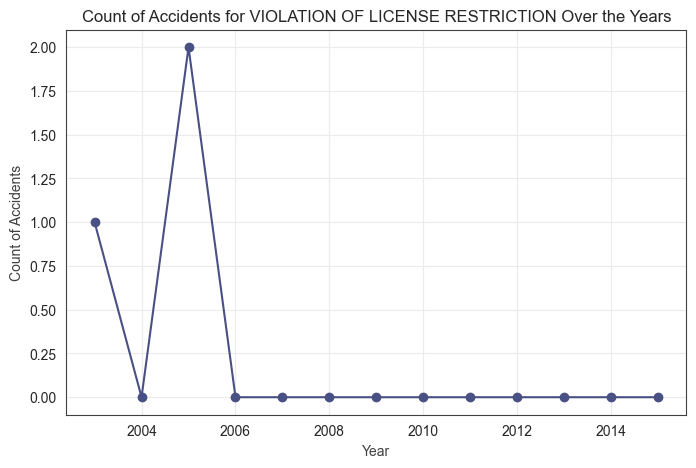

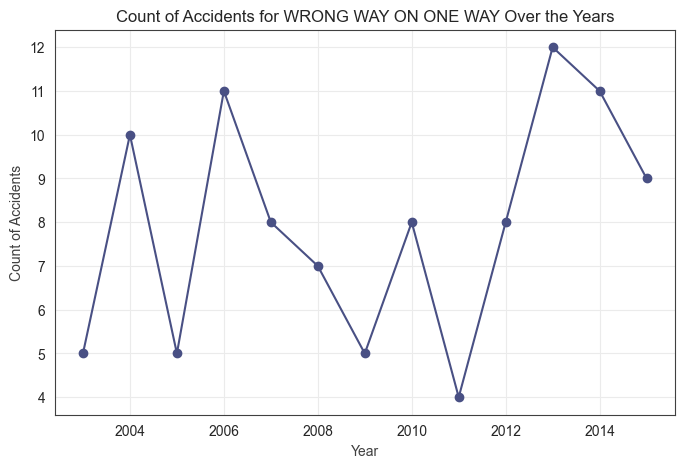

In [120]:
for primary_factor in cross_tab_transposed.columns:
    plt.figure(figsize=(8, 5))
    plt.plot(cross_tab_transposed.index, cross_tab_transposed[primary_factor], color='#495084', marker='o')
    
    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Count of Accidents')
    plt.title(f'Count of Accidents for {primary_factor} Over the Years')
    
    # Show the plot
    plt.grid(True)
    plt.show()

### Bono

In [124]:
month_ft = freq_table(df, 'Month')
month_df = month_ft[:-1]
month_df

,Value,Frequency,Relative Freq.
0,10,5581,10.35
1,9,4994,9.26
2,11,4884,9.05
3,1,4665,8.65
4,12,4598,8.52
5,4,4574,8.48
6,2,4541,8.42
7,8,4480,8.31
8,5,4212,7.81
9,3,3842,7.12


Text(0.5, 1.0, 'Accidents per Month')

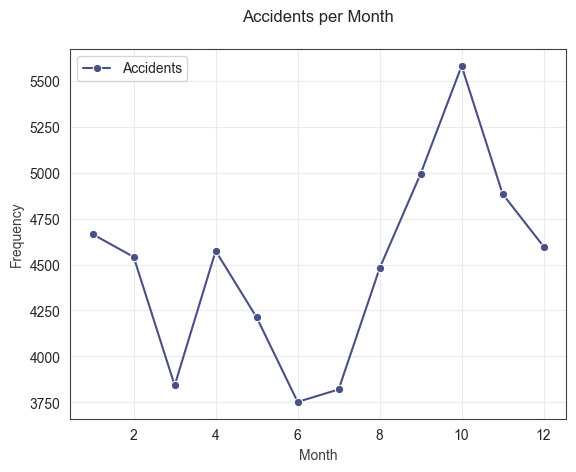

In [125]:
sns.set_style('whitegrid', {'grid.color': '.92', 'grid.linestyle': '-', 'axes.labelcolor': '.25', 'axes.edgecolor': '.25'})
sns.lineplot(x='Value', y='Frequency', data=month_df, marker='o', color='#495084', label='Accidents')

plt.xlabel('Month')
plt.title('Accidents per Month', pad=20)

In [126]:
grouped_data = df.groupby(['Month', 'Primary Factor']).size().reset_index(name='Accident Count')
grouped_data

,Month,Primary Factor,Accident Count
0,1,ACCELERATOR FAILURE OR DEFECTIVE,8
1,1,ALCOHOLIC BEVERAGES,78
2,1,ANIMAL/OBJECT IN ROADWAY,111
3,1,BRAKE FAILURE OR DEFECTIVE,26
4,1,CELL PHONE USAGE,5
...,...,...,...
554,12,UNSAFE BACKING,363
555,12,UNSAFE LANE MOVEMENT,57
556,12,UNSAFE SPEED,116
557,12,VIEW OBSTRUCTED,10


La siguiente tabla representa un ranking por mes del top 4 causas principales de los accidentes de tráfico. Como se puede observar, las causas tienden a ser las mismas indistintamente del mes que se esté analizando, lo cual indica fuertemente que no existe ningún tipo de correlación significativa entre el mes y las causas de los accidentes de tráfico.

La observación anterior nos permite concluir que las causas de los accidentes de tráfico no dependen en gran medida del momento, sino del lugar en el que ocurren. Este hallazgo denota la importancia de incrementar la rigurosidad a la hora de recolectar información de los hechos que puedan explicar la causalidad de los diferentes accidentes de tráfico.

Comparando el ranking con la gráfica de accidentes por mes se puede observar que si bien los accidentes aumentan a final de año, sus causas siguen siendo las mismas.

In [132]:
top_factors_per_month = grouped_data.groupby('Month').apply(lambda x: x.nlargest(4, 'Accident Count')).reset_index(drop=True)
top_factors_per_month

,Month,Primary Factor,Accident Count
0,1,FAILURE TO YIELD RIGHT OF WAY,939
1,1,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,507
2,1,FOLLOWING TOO CLOSELY,499
3,1,UNSAFE BACKING,383
4,2,FAILURE TO YIELD RIGHT OF WAY,844
5,2,FOLLOWING TOO CLOSELY,540
6,2,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,508
7,2,UNSAFE BACKING,430
8,3,FAILURE TO YIELD RIGHT OF WAY,824
9,3,FOLLOWING TOO CLOSELY,487
